<a href="https://colab.research.google.com/github/vishwajeet1024/Practice-Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Colllection and Processing

In [25]:
# loading the data from csv file to pandas dataFrame
car_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv')

# loading the first 5 rows of the dataFrame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
# checking the no. of rows and the columns
car_dataset.shape

(301, 9)

In [27]:
# getting some  information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
# checking the no. of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [29]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print("--------------------------------------")
print(car_dataset.Seller_Type.value_counts())
print("--------------------------------------")
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
--------------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
--------------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [30]:
# encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)

# encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace =True)

# encoding "Transimission" column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

/tmp/ipython-input-1327136891.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
/tmp/ipython-input-1327136891.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace =True)
/tmp/ipython-input-1327136891.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [31]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliting the data and the target

In [32]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [33]:
print(X)
print("--------------------------------------")
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting Training and Test Data

In [34]:
# splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.1, random_state = 2)

# checking no. of Rows and columns of training, testing data
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

1. Linear Regression

In [35]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [36]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evalution

In [37]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [38]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square error :", error_score)

R square error : 0.8799451660493711


Visualize the actual price and the predicted price

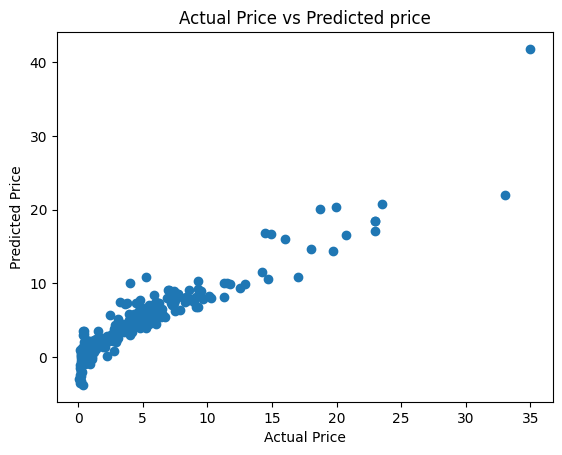

In [39]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted price")
plt.show()

In [40]:
# prediction on testing data
test_data_prediction  = lin_reg_model.predict(X_test)

In [41]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error :", error_score)

R square error : 0.8365766715027051


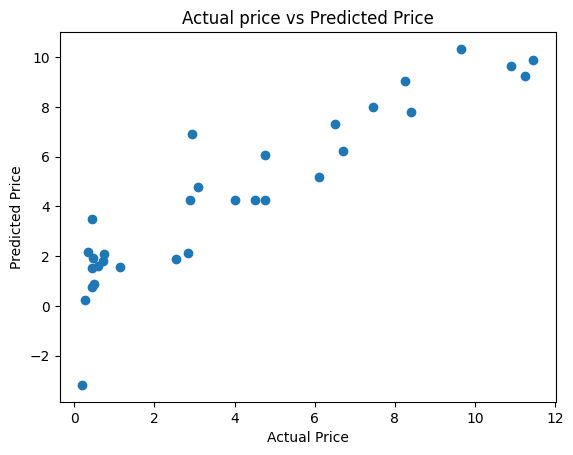

In [42]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

2. Lasso Regression

In [43]:
# loading the lasso regresion model
lass_reg_model = Lasso()

In [44]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [45]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [46]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square error :", error_score)

R square error : 0.8427856123435794


Visualize the actual price and the predicted price

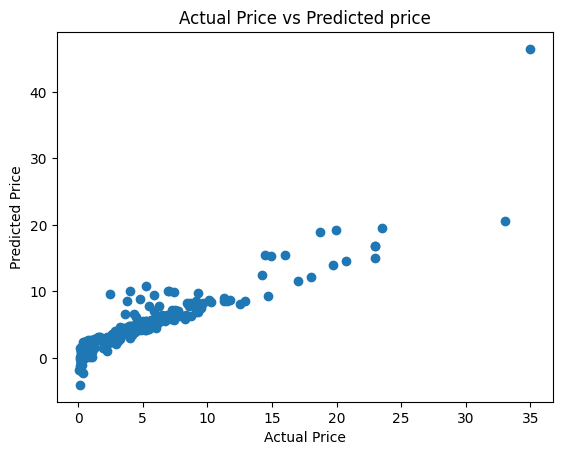

In [47]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted price")
plt.show()

In [48]:
# prediction on testing data
test_data_prediction  = lin_reg_model.predict(X_test)

In [49]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error :", error_score)

R square error : 0.8365766715027051


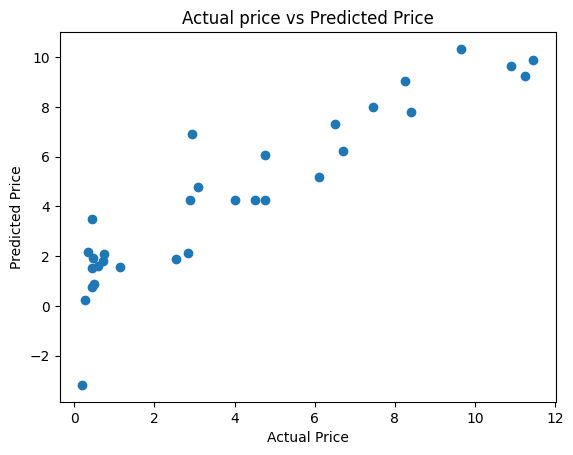

In [50]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()